In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from db_connection import df
df

     student_id  age  gender parent_education  attendance_percentage  \
0             1   18    Male              PhD                  64.73   
1             2   26    Male      High School                  84.83   
2             3   26  Female         Bachelor                  74.40   
3             4   24    Male           Master                  68.67   
4             5   26  Female      High School                  65.96   
..          ...  ...     ...              ...                    ...   
334         335   19  Female              PhD                  66.01   
335         336   20   Other              PhD                  64.03   
336         337   22    Male         Bachelor                  74.46   
337         338   24    Male           Master                  92.69   
338         339   19    Male           Master                  61.18   

     study_hours_per_week  assignments_completed  previous_gpa  final_score  \
0                    17.9                      1        

c:\Users\Viswanath Anand\Downloads\sql-ml\db_connection.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


,student_id,age,gender,parent_education,attendance_percentage,study_hours_per_week,assignments_completed,previous_gpa,final_score,pass
0,1,18,Male,PhD,64.73,17.9,1,3.76,127.23,0
1,2,26,Male,High School,84.83,20.0,0,3.78,131.91,1
2,3,26,Female,Bachelor,74.40,8.6,1,3.63,110.41,1
3,4,24,Male,Master,68.67,14.8,1,3.59,112.09,0
4,5,26,Female,High School,65.96,9.5,1,3.35,104.49,0
...,...,...,...,...,...,...,...,...,...,...
334,335,19,Female,PhD,66.01,23.7,1,2.47,118.43,0
335,336,20,Other,PhD,64.03,13.4,1,3.61,109.27,0
336,337,22,Male,Bachelor,74.46,15.9,1,3.27,111.44,1
337,338,24,Male,Master,92.69,14.0,1,3.62,125.28,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             339 non-null    int64  
 1   age                    339 non-null    int64  
 2   gender                 339 non-null    object 
 3   parent_education       339 non-null    object 
 4   attendance_percentage  339 non-null    float64
 5   study_hours_per_week   339 non-null    float64
 6   assignments_completed  339 non-null    int64  
 7   previous_gpa           339 non-null    float64
 8   final_score            339 non-null    float64
 9   pass                   339 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 26.6+ KB


In [4]:
df.describe()

,student_id,age,attendance_percentage,study_hours_per_week,assignments_completed,previous_gpa,final_score,pass
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,170.000000,22.525074,80.142802,14.582891,0.687316,3.040295,111.847345,0.581121
std,98.005102,2.859913,11.812073,5.636882,0.464272,0.540612,15.540173,0.494105
min,1.000000,18.000000,60.070000,5.000000,0.000000,2.010000,73.250000,0.000000
25%,85.500000,20.000000,68.920000,9.500000,0.000000,2.560000,99.635000,0.000000
50%,170.000000,22.000000,80.170000,14.800000,1.000000,3.080000,110.410000,1.000000
75%,254.500000,25.000000,90.130000,19.250000,1.000000,3.460000,124.185000,1.000000
max,339.000000,27.000000,99.810000,25.000000,1.000000,4.000000,148.030000,1.000000


### Univariate Analysis

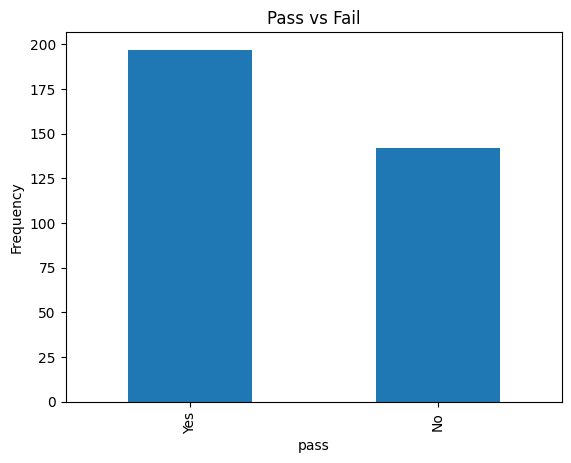

In [5]:
df['pass'].value_counts().plot(kind='bar')
plt.title("Pass vs Fail")
plt.xticks(ticks=[0,1],labels=['Yes','No'])
plt.ylabel('Frequency')
plt.show()

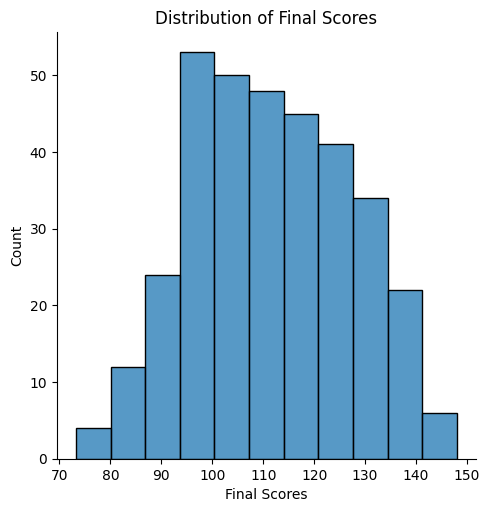

In [6]:
sns.displot(df['final_score'])
plt.title("Distribution of Final Scores")
plt.xlabel("Final Scores")
plt.show()

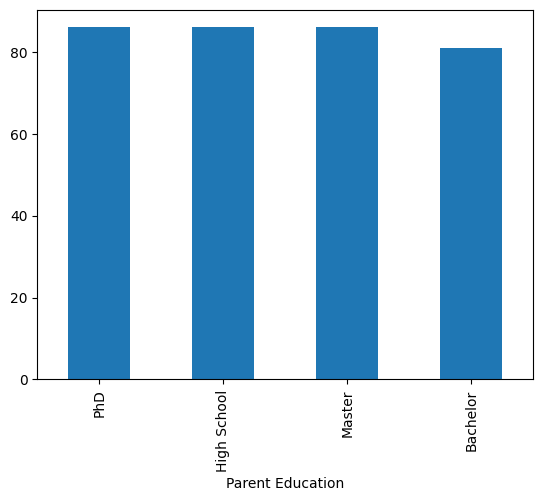

In [7]:
df['parent_education'].value_counts().plot(kind='bar')
plt.xlabel('Parent Education')
plt.show()

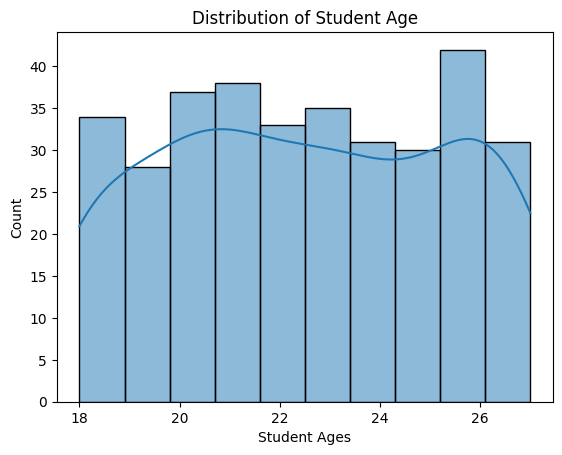

In [8]:
sns.histplot(df['age'],kde=True)
plt.title('Distribution of Student Age')
plt.xlabel('Student Ages')
plt.show()

### Bivariate Analysis

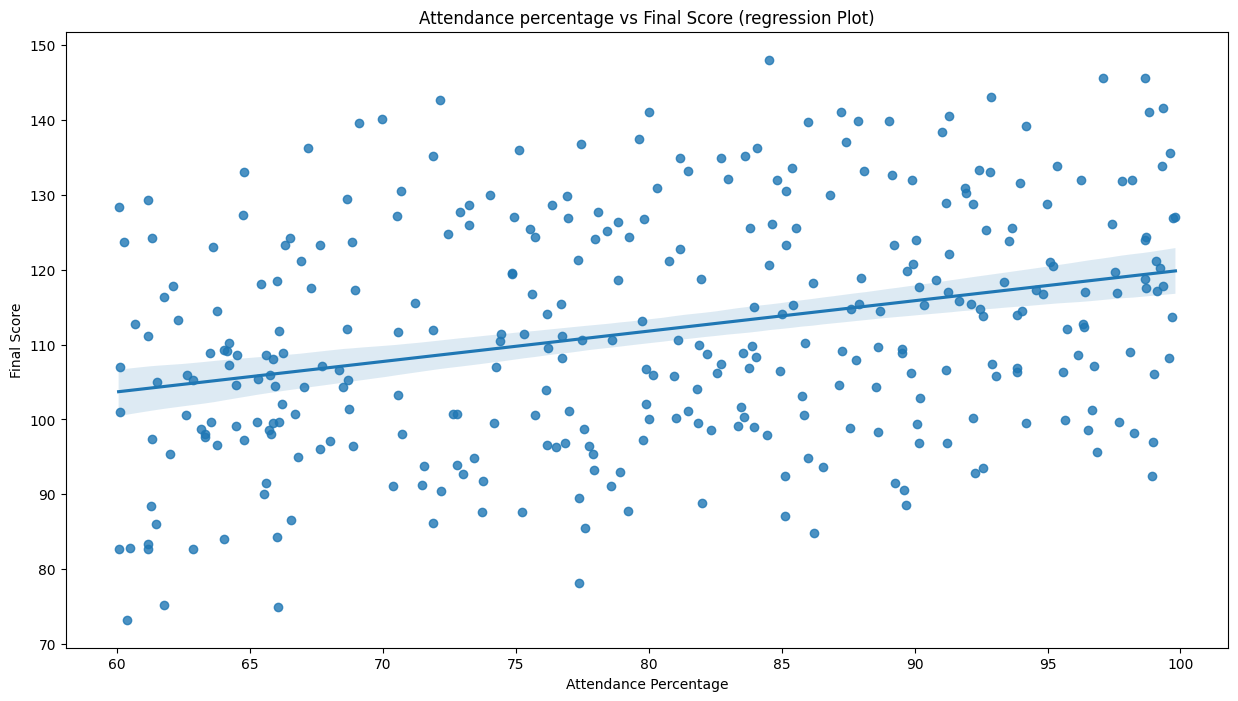

In [9]:
plt.figure(figsize=(15,8))
sns.regplot(x=df['attendance_percentage'],y=df['final_score'])
plt.title('Attendance percentage vs Final Score (regression Plot)')
plt.xlabel('Attendance Percentage')
plt.ylabel('Final Score')
plt.show()

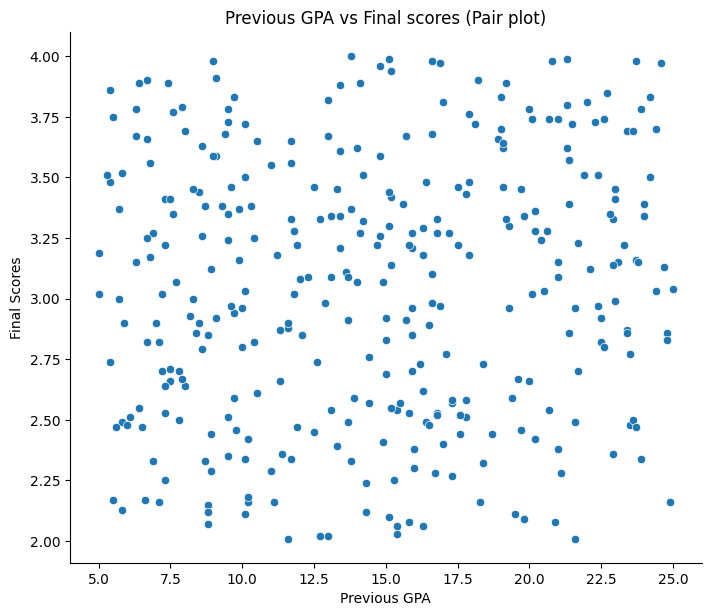

In [10]:

sns.pairplot(data=df,x_vars='study_hours_per_week',y_vars='previous_gpa',height=6,aspect=1.2)
plt.xlabel('Previous GPA')
plt.ylabel('Final Scores')
plt.title('Previous GPA vs Final scores (Pair plot)')
plt.show()

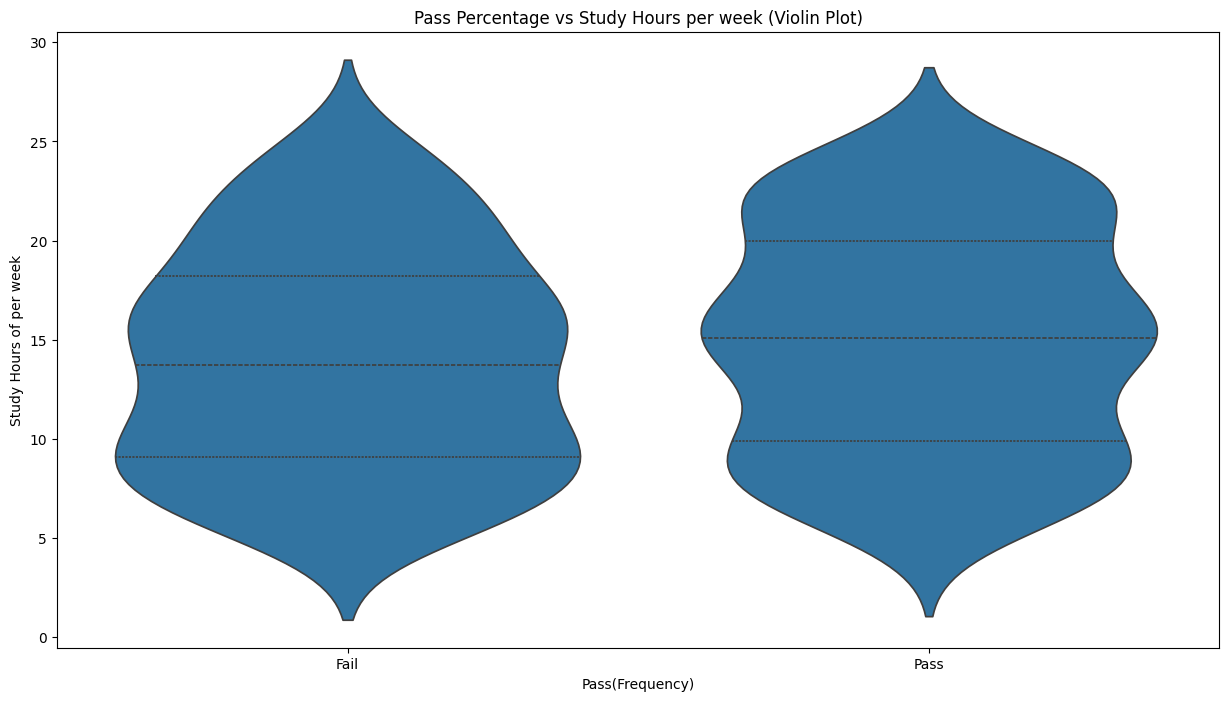

In [11]:
plt.figure(figsize=(15,8))
sns.violinplot(data=df,x='pass',y='study_hours_per_week',inner='quartile')
plt.title('Pass Percentage vs Study Hours per week (Violin Plot)')
plt.xlabel('Pass(Frequency)')
plt.xticks([0, 1], ['Fail', 'Pass'])
plt.ylabel('Study Hours of per week')
plt.show()

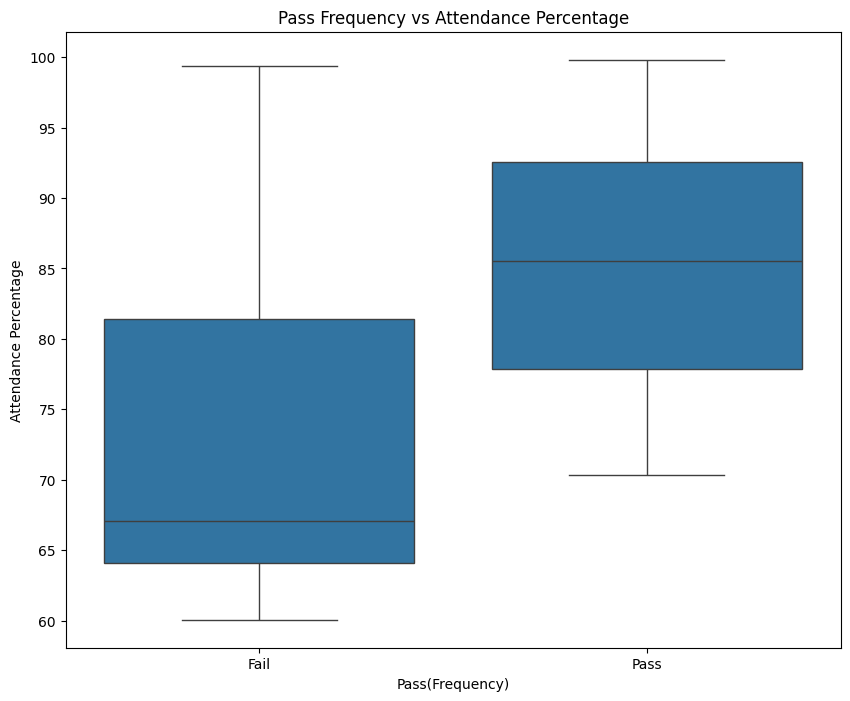

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='pass',y='attendance_percentage')
plt.xlabel('Pass(Frequency)')
plt.xticks([0,1],['Fail','Pass'])
plt.ylabel('Attendance Percentage')
plt.title('Pass Frequency vs Attendance Percentage')
plt.show()

In [13]:
numerical_columns = df.select_dtypes(include=np.number).columns

In [14]:
numerical_columns.values

array(['student_id', 'age', 'attendance_percentage',
       'study_hours_per_week', 'assignments_completed', 'previous_gpa',
       'final_score', 'pass'], dtype=object)

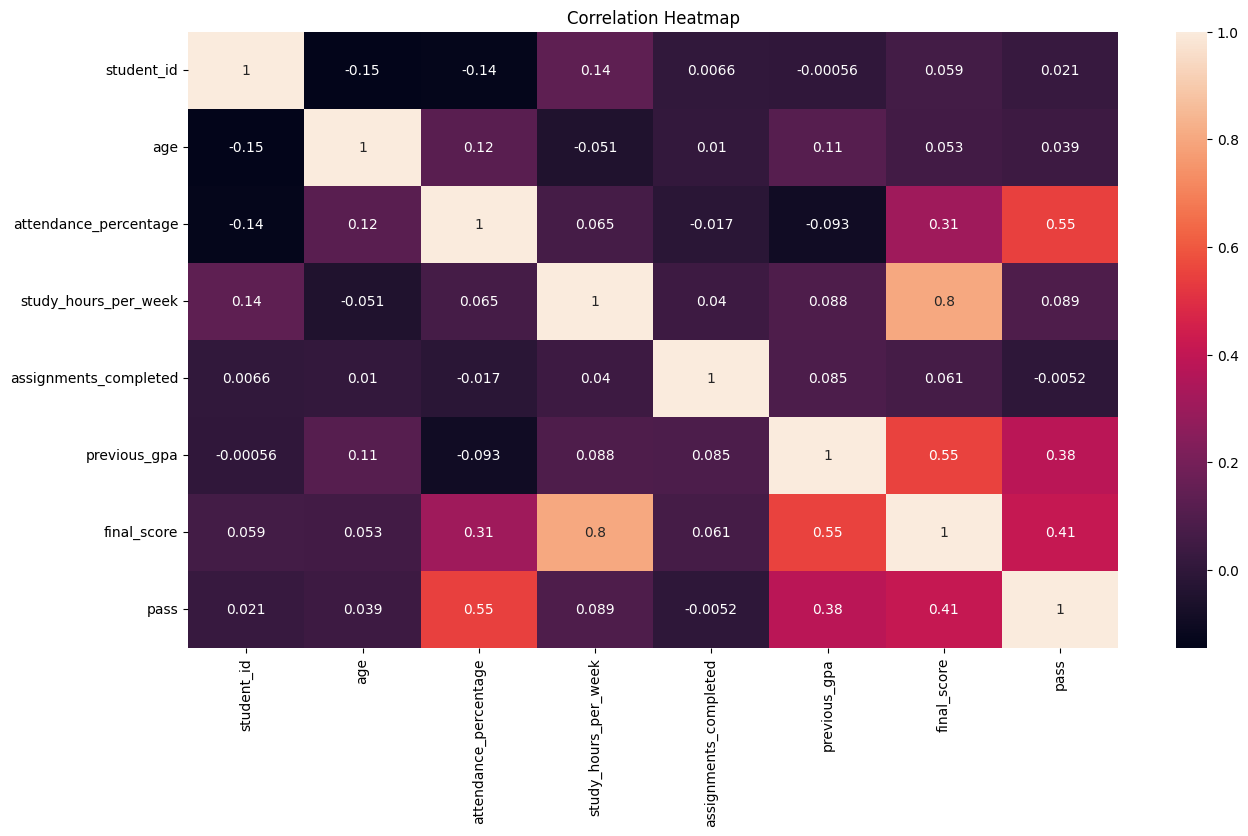

In [15]:
plt.figure(figsize=(15,8))
corr = df[numerical_columns.values].corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

### Final Score Prediction

In [16]:
X = df[['gender','attendance_percentage','study_hours_per_week', 'assignments_completed', 'previous_gpa']].values
y = df['final_score'].values

In [24]:
from sklearn.preprocessing import OrdinalEncoder

class ModelWithPreprocessing:
    def __init__(self,model):
        self.model = model
        self.encoder = OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=-1
        )
    
    def fit(self,X,y):
        X = X.copy()
        X[:,[0]] = self.encoder.fit_transform(X[:,[0]])
        self.model.fit(X,y)
        return self
    
    def predict(self,X):
        X = X.copy()
        X[:,[0]] = self.encoder.transform(X[:,[0]])
        y_pred = self.model.predict(X)
        return y_pred


In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model = ModelWithPreprocessing(lr)

In [32]:
model.fit(X,y)

In [33]:
import joblib

joblib.dump(model,"predictor.joblib")

['predictor.joblib']